In [1]:
import tensorflow as tf
from tensorflow import  keras
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("https://raw.githubusercontent.com/KeithGalli/neural-nets/master/examples/clusters/data/train.csv")
train_df.head()

,x,y,color
0,0.129270,1.979720,red
1,-0.380831,1.693519,red
2,0.718693,1.791793,red
3,0.722922,0.620655,red
4,-0.432689,0.541550,red


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       6000 non-null   float64
 1   y       6000 non-null   float64
 2   color   6000 non-null   object 
dtypes: float64(2), object(1)
memory usage: 140.8+ KB


In [39]:
unique = train_df["color"].unique()
unique_colors = list(unique)
unique_colors

['red', 'blue', 'green', 'teal', 'orange', 'purple']

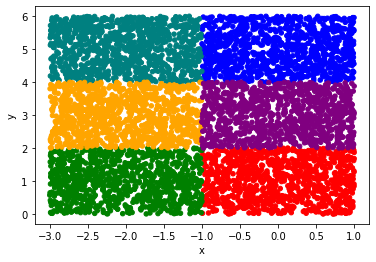

In [7]:
color = train_df["color"].map({"red":"r","blue":"b","green":"g","teal":"teal","orange":"orange","purple":"purple"})
train_df.plot(kind="scatter",x="x",y="y",c=color)

In [16]:
train_df["encoded_color"] = train_df["color"].apply(lambda color : unique_colors.index(color))
train_df.head()

,x,y,color,encoded_color
0,0.129270,1.979720,red,0
1,-0.380831,1.693519,red,0
2,0.718693,1.791793,red,0
3,0.722922,0.620655,red,0
4,-0.432689,0.541550,red,0


In [18]:
train_df["encoded_color"].unique()

array([0, 1, 2, 3, 4, 5])

In [17]:
np.random.shuffle(train_df.values)
train_df.head()

,x,y,color,encoded_color
0,0.129270,1.979720,red,0
1,-0.380831,1.693519,red,0
2,0.718693,1.791793,red,0
3,0.722922,0.620655,red,0
4,-0.432689,0.541550,red,0


In [20]:
model = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(14,activation="relu"),
    keras.layers.Dense(14,activation="relu"),
    keras.layers.Dense(6,activation="sigmoid")   
])

model.compile(optimizer="adam",
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

model.fit(train_df[["x","y"]].values,train_df["encoded_color"].values,batch_size=4,epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1500/1500 [==============================] - 4s 3ms/step - loss: 0.8176 - accuracy: 0.7238
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2294 - accuracy: 0.9378
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1457 - accuracy: 0.9615
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1180 - accuracy: 0.9682
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1007 - accuracy: 0.9723
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0915 - accuracy: 0.9708
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0830 - accuracy: 0.9755
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0782 - accuracy: 0.9745
Epoch 9/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0729 - accuracy: 0.9750
Epoch 10/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0672 - accurac

In [21]:
test_df = pd.read_csv("https://raw.githubusercontent.com/KeithGalli/neural-nets/master/examples/clusters/data/test.csv")
test_df.head()

,x,y,color
0,-0.173868,1.381852,red
1,-0.724148,1.883008,red
2,-0.423915,1.408297,red
3,-0.650162,1.296067,red
4,0.957933,0.633111,red


In [22]:
test_df["encoded_color"] = test_df["color"].apply(lambda color : unique_colors.index(color))
test_df.head()

,x,y,color,encoded_color
0,-0.173868,1.381852,red,0
1,-0.724148,1.883008,red,0
2,-0.423915,1.408297,red,0
3,-0.650162,1.296067,red,0
4,0.957933,0.633111,red,0


In [23]:
model.evaluate(test_df[["x","y"]].values,test_df["encoded_color"])

38/38 [==============================] - 0s 1ms/step - loss: 0.0644 - accuracy: 0.9817


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


[0.06436341255903244, 0.9816666841506958]

In [43]:
prediction = model.predict(np.array([[-1,2],[-2,5]]))
unique[prediction.argmax(axis=1)]

array(['orange', 'teal'], dtype=object)